# Monod equation

https://en.wikipedia.org/wiki/Monod_equation

[*********************100%***********************]  1 of 1 completed


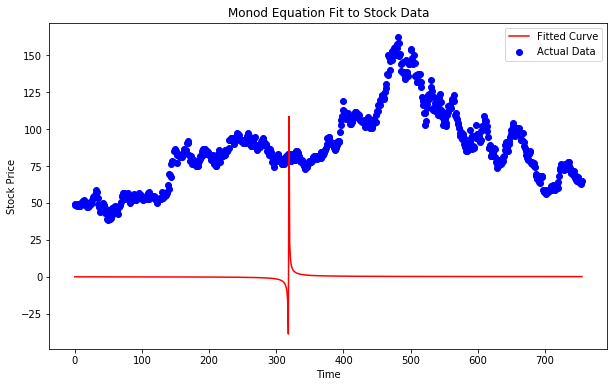

Estimated parameters:
Vmax: 0.0895640768155992
Ks: -318.7367227108291


In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Monod equation function
def monod_equation(t, Vmax, Ks):
    """
    Monod equation for modeling stock price growth.
    
    Parameters:
        t (array-like): Time or some relevant variable.
        Vmax (float): Maximum growth rate.
        Ks (float): Half-saturation constant.
    
    Returns:
        array-like: Predicted stock prices.
    """
    return Vmax * t / (Ks + t)

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close'].values
t = np.arange(len(data))  # Use time as the independent variable

# Fit the Monod equation to the data
initial_guess = [0.01, 100]  # Initial guess for Vmax and Ks
params, params_covariance = curve_fit(monod_equation, t, data, p0=initial_guess)

Vmax, Ks = params

# Generate predicted stock prices using the fitted parameters
predicted_data = monod_equation(t, Vmax, Ks)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(t, data, label='Actual Data', color='b')
plt.plot(t, predicted_data, label='Fitted Curve', color='r')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Monod Equation Fit to Stock Data')
plt.legend()
plt.show()

# Print the estimated parameters
print("Estimated parameters:")
print(f"Vmax: {Vmax}")
print(f"Ks: {Ks}")